# Open Data Project Presentation CODE1161 📺
Name:  Tan Zhi Yi (z5441085)

Topic: AirBnBs in Tasmania, Australia

![All the suburbs in Tasmania](airbnbs_availability.png)

# Data Collection 🔍
What is this dataset about? This dataset is an excel file that encompasses various aspects, such as the number of listings, locations (longitude and latitude), prices, availability, reviews and host information of the Airbnb rental homes in Tasmania. 

It was downloaded through 'Inside Airbnb' and consists of 5577 rows and 18 columns in the categorical dataset. The reason for chosing this dataset collection is to undergo a detailed analysis on how the different aspects of AirBnBs affect their listing prices. 

The data was collected through scraping, which involves automatically extracting information from web pages and storing it in a structured format for analysis.

# Analysis Topics 💡
As stated above, the goal of this open data project is to analyse the relationship between the multiple aspects of an AirBnB in Tasmania and how it affects its prices. Below are the several aspects that I will be analysing which may determine the price of an AirBnB, including:

    1. Listing Type (Shared/Private?)
    2. Location (Longitude and Latitude)
    3. Number Of Reviews
    4. Minimum Number of Nights

Lets start by importing the appropriate files.

In [179]:
# use command 'python3 -m notebook'
import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statistics

Now that we have downloaded the appropriate files, we can read and download the excel file from out folder.

In [180]:
%matplotlib inline
penalty_data = pd.read_excel("TAS AirBnb.xlsx")

The number of columns and rows of the dataset are obtained as below:

In [181]:
print(f"Total Number of Listings: {len(penalty_data)}")
print(f"Total Number of Categories: {penalty_data.shape[1]}")

Total Number of Listings: 5577
Total Number of Categories: 18


We can also obtain the first few rows of our dataset shown below:

In [182]:
penalty_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35644,Central Hobart Historic Cottage,153268,Yvette,NaN,Hobart,-42.87895,147.31526,Private room,57,1,257,2020-03-08,2.06,3,0,0,Exempt: This listing falls under Section 12 of...
1,84581,Kentisbury Country House Cradle Coast Tasmania,461471,Melissa,NaN,Kentish,-41.38856,146.23210,Entire home/apt,295,2,109,2023-02-27,1.24,1,316,45,Exempt: This listing falls under Section 12 of...
2,137808,Bradman House CBD Launceston Invermay + Free WIFI,673625,Emma And Dale,NaN,Launceston,-41.42683,147.12905,Entire home/apt,239,1,335,2023-03-04,2.49,2,336,74,DA0518/2019
3,268482,"Anderson Suite, The Ark Stanley, Guest House",1406692,Rhonda,NaN,Circular Head,-40.76467,145.29878,Private room,367,1,5,2022-02-05,0.06,7,241,0,Exempt: This listing falls under Section 12 of...
4,88873,Terrace- 5mins to central Hobart,485048,Russell And Ingrid,NaN,Hobart,-42.88267,147.32400,Entire home/apt,125,2,541,2023-03-06,3.76,1,169,57,Exempt: This listing falls under Section 12 of...


# Listing Type 🏠
Will the room type affect the price of AirBnB listings?

Firstly, we can plot a bar chart that displays the total number of listings in Tasmania for each room type to determine which room types are most popular in Tasmania.

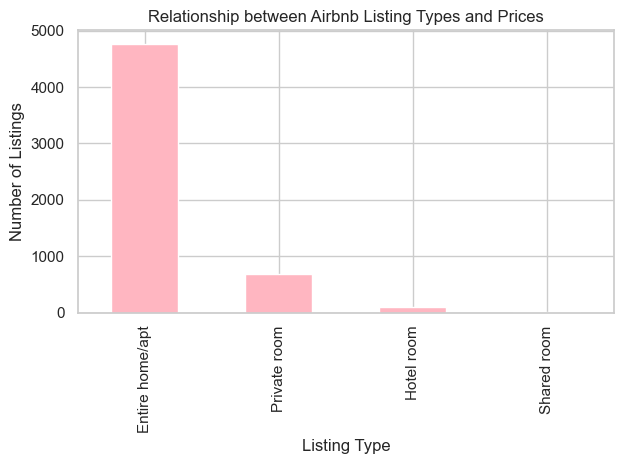

In [183]:
# Bar Chart
upper_bound = 5000
bar_chart = penalty_data.room_type.value_counts()
bar_chart[bar_chart < upper_bound].plot(kind="bar", color="lightpink")

# Labels
plt.title('Relationship between Airbnb Listing Types and Prices')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

We can see that entire home/apt are the most popular listing types, and shared rooms are the least popular type. However, does the number of room types affect its price? Let's plot a line graph to display the average cost of listing per night for that respective room type to investigate the relationship between both variables.

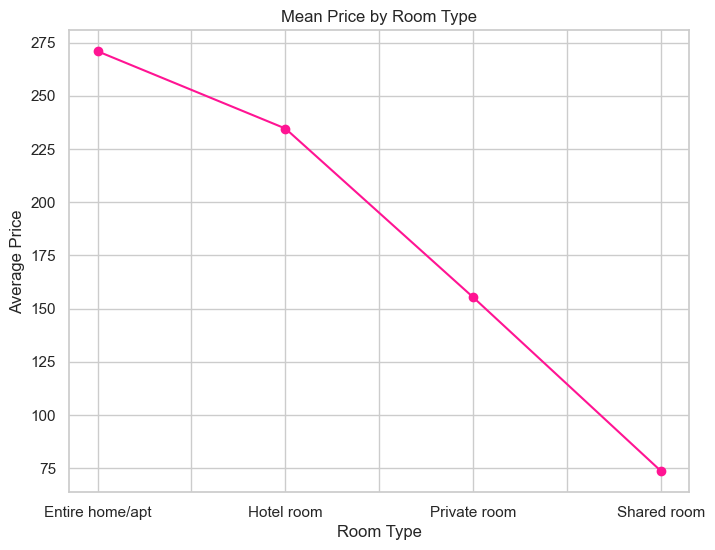

In [184]:
# Group by 'room_type' and calculate the mean of 'price'
df = pd.DataFrame(penalty_data)
mean_price_by_room_type = df.groupby('room_type')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
mean_price_by_room_type.plot(kind='line', marker='o', color='deeppink')
plt.title('Mean Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

The analysis revealed that although entire homes/apt are most costly, travellers are willing to invest more for exclusive use of accommodations and additional space. Conversely, shared rooms were found to be the most affordable option, making them an economical choice for budget-conscious travelers. Hotel rooms have a lower availability than private rooms but have a higher cost, most likely catering to travelers seeking a more luxurious and pampered experience during their stay. In conclusion, the listing types and prices are offered to align with travelers needs.

# Location 🌏
Will the location of a listing affect its price?

First, we can obtain a bar chart of the number of listings in each suburb as shown below:

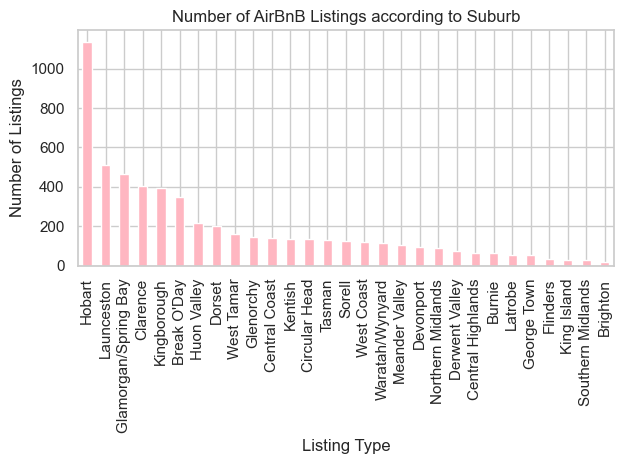

In [185]:
# Bar Chart
upper_bound = 3000
bar_chart = penalty_data.neighbourhood.value_counts()
bar_chart[bar_chart < upper_bound].plot(kind="bar", color="lightpink")

# Labels
plt.title('Number of AirBnB Listings according to Suburb')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

We can also plot an interactive map of the listings to get a detailed breakdown on which area is most costly (closer to yellow) and which areas are the least costly (closer to purple).

In [198]:
# Create a scatter map with Mapbox
fig = px.scatter_mapbox(
    penalty_data,
    lat="latitude",
    lon="longitude",
    color="price",  # Color the points based on the price
    hover_name="price",  # Display price on hover
    hover_data=["price"],  # Additional data to display on hover
    zoom=5,  # Initial zoom level
    range_color=(0, 800)
)

# Set the Mapbox style (you can choose other styles)
fig.update_layout(mapbox_style="carto-positron")
fig.show()

The interactive map above shows that although Hobart has the most number of listings, it has a mixture of low and high cost AirBnBs. Consequently, King Island, which is located on the top left above Tasmania has only a few number of listings but is more costly with most of the listings in the upper range of $600 to $800 (orange to yellow colours in the mapbox color scale). So, we can conclude the location of an AirBnB does in fact affect its price.

# Number of Reviews 🌟

Does the number of reviews affect the price of an AirBnb?

Let's plot a graph of the number of reviews against the average nightly price of an AirBnB to investigate if there is any relation between them.

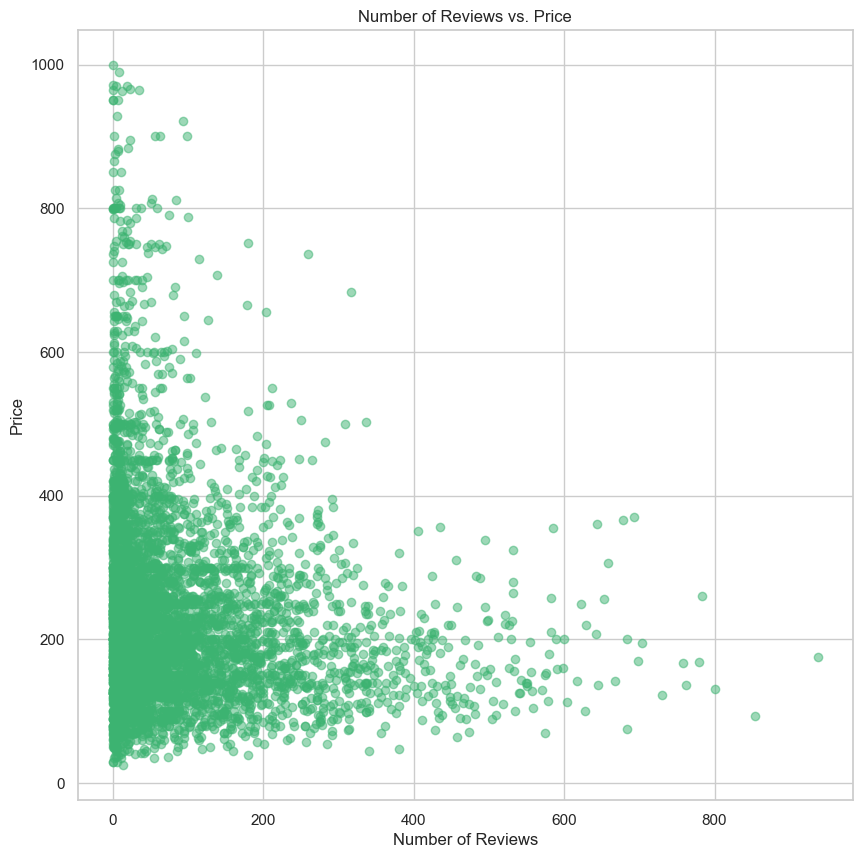

In [204]:
filtered_price = penalty_data[penalty_data['price'] < 1000]

plt.figure(figsize=(10, 10))
plt.scatter(filtered_price['number_of_reviews'], filtered_price['price'], c='mediumseagreen', alpha=0.5)
plt.ylabel('Price')
plt.xlabel('Number of Reviews')
plt.title('Number of Reviews vs. Price')
plt.grid(True)
plt.show()

From the scatterplot above, we can observe that the number of reviews do not necessarily affect the price of an AirBnB. For example, the listing with the highest number of reviews (in bottom right) only has a nightly price of less than $200. On the other hand, there are multiple listings that have little to no reviews yet priced in the higher end range. Therefore, the number of reviews of an AirBnB does not highly affect its listing price.

# Minimum No. of Nights 📅

How does the prices vary with the number of nights?

In our last aspect, we wanna know how the minimum length of stay affects the price, i.e. does it get cheaper if you stay longer? 

We can first find the mean and mode of minimum nights to see the normal values of the distribution.

In [189]:
print(f'Mean of minimum_nights: {np.mean(penalty_data["minimum_nights"])}')
print(f"Mode of minimum_nights: {penalty_data[(penalty_data['minimum_nights'] <= 30) & (penalty_data['minimum_nights'] > 0)]['minimum_nights'].mode()[0]}")

Mean of minimum_nights: 2.2917339071185223
Mode of minimum_nights: 2


We see that most listings only require 2 minimum nights. Let's do some further analysing and plot a single line graph to observe how the average price changes as the minumum night increases.

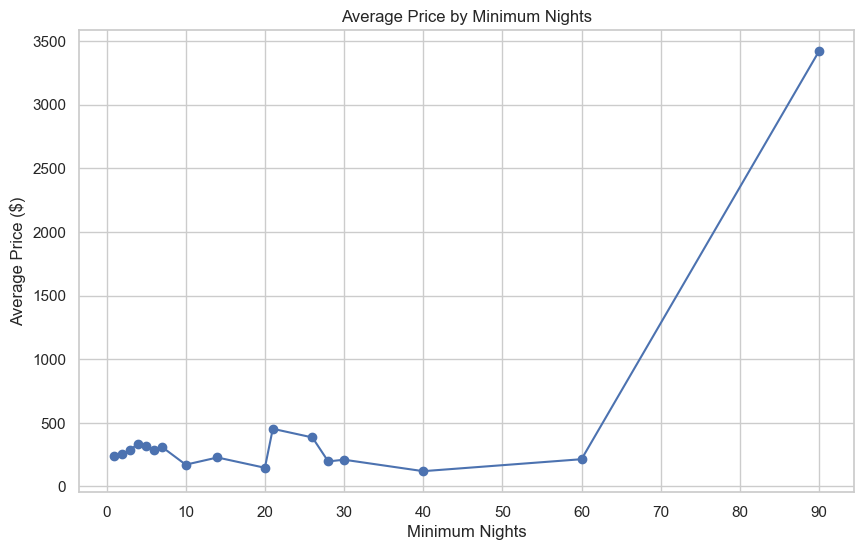

In [202]:
upper_bound = 90
df = penalty_data[penalty_data['minimum_nights'] <= upper_bound]

# Group data by min_nights and calculate the average price
average_price_by_nights = df.groupby('minimum_nights')['price'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_nights['minimum_nights'], average_price_by_nights['price'], marker='o')
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Minimum Nights')
plt.grid(True)
plt.xticks(np.arange(0, upper_bound+1, step=10))  # Customize x-axis ticks
plt.show()

From above, we can see that there is no determined relationship between the minimum number of nights and its respective price. However, this may be because of bad data.

# Conclusion 🛫

There are many aspects that affect the price of AirBnBs not just in Tasmania but around the world. Thus, we must consider the importance of the aspects and decide on an accommodation that suits our needs the most.

# Thank You! 😚